# Benchmark Results Analysis

In [2]:
%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import copy
import numpy as np
from scipy.stats import spearmanr
import pandas as pd
from src.plot_scores import *

<Figure size 400x400 with 0 Axes>

In [3]:
def plot_scores_histograms(results_dfs_list, metrics, plot_type, output_dir, output_name, hue_col=None):
    # plot a histogram for each metric
    for metric in metrics:
        output_filepath = os.path.join(output_dir, f'{output_name}_{metric}_hist.svg')
        plot_score_distributions(results_dfs_list, metric=metric, hue_col=hue_col, plot_type=plot_type, output_filepath=output_filepath)

def plot_scoring_metrics_correlations(results_df, output_dir, output_name, color):
    metric_pairs = [('ptm', 'mmalign_tmscore'),
                    ('huintaf2_pdockq_8Acutoff', 'dockq'),
                    ('iptm', 'dockq')]
    for metric_pair in metric_pairs:
        if (metric_pair[0] in results_df.columns.to_list()) and (metric_pair[1] in results_df.columns.to_list()):
            output_filepath = os.path.join(output_dir, f'{output_name}_{metric_pair[0]}_{metric_pair[1]}_scatterplot.svg')
            plot_true_vs_predicted_scores(results_df=results_df, metric1=metric_pair[0],
                                          metric2=metric_pair[1],
                                          output_filepath=output_filepath, correlation_type='spearman', color=color,
                                          figsize=(3.5, 3.5))
    
def plot_capri_class_calc_success_rate(results_df, output_dir):
    plot_capri_class_counts(results_df=results_df, dockq_col='dockq', output_dir=output_dir)

    # DockQ success rate
    results_df_no_nans = copy.deepcopy(results_df).dropna(subset='dockq', axis=0)
    results_df_no_nans['capri_class'] = results_df_no_nans['dockq'].apply(get_capri_class)
    dockq_success_rate = round((results_df_no_nans[results_df_no_nans['capri_class'] != 'Incorrect'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'DockQ success rate: {dockq_success_rate}%')

    acceptable = round((results_df_no_nans[results_df_no_nans['capri_class'] == 'Acceptable'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'Acceptable quality pairs: {acceptable}%')
    medium = round((results_df_no_nans[results_df_no_nans['capri_class'] == 'Medium'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'Medium quality pairs: {medium}%')
    high = round((results_df_no_nans[results_df_no_nans['capri_class'] == 'High'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'High quality pairs: {high}%')

def compare_af2_vs_af3(af2_df, af3_df, output_dir, output_name):
    metrics = ['mmalign_tmscore', 'dockq']
    for metric in metrics:
        output_filepath = os.path.join(output_dir, f'{output_name}_{metric}_violinplot.svg')
        plot_comparison_af_version(af2_df, af3_df, metric, output_filepath, plot_type='violinplot')


def get_success_rates(results_df):
    results_df_no_nans = copy.deepcopy(results_df).dropna(subset='dockq', axis=0)
    results_df_no_nans['capri_class'] = results_df_no_nans['dockq'].apply(get_capri_class)
    dockq_success_rate = round((results_df_no_nans[results_df_no_nans['capri_class'] != 'Incorrect'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'DockQ success rate: {dockq_success_rate}%')

    acceptable = round((results_df_no_nans[results_df_no_nans['capri_class'] == 'Acceptable'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'Acceptable quality pairs: {acceptable}%')
    medium = round((results_df_no_nans[results_df_no_nans['capri_class'] == 'Medium'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'Medium quality pairs: {medium}%')
    high = round((results_df_no_nans[results_df_no_nans['capri_class'] == 'High'].shape[0] /
                          results_df_no_nans.shape[
                              0]) * 100, 2)
    print(f'High quality pairs: {high}%')

In [4]:
bacteria_fullseq_df = pd.read_csv('../results/af2_benchmark/bacteria_mammalia_dimers_fullseq_onlybestmodel_dockqselectedresidues_deduplicated.csv')
virus_fullseq_df = pd.read_csv('../results/af2_benchmark/virus_mammalia_dimers_fullseq_onlybestmodel_dockqselectedresidues_deduplicated.csv')
results_df_fullseq_both_af2 = pd.concat([virus_fullseq_df, bacteria_fullseq_df], ignore_index=True)
results_df_fullseq_both_af2['AlphaFold version'] = '2'

bacteria_fullseq_af3_df = pd.read_csv('../results/af3_benchmark/bacteria_mammalia_dimers_fullseq_af3_notemplates_dockqselectedresidues_deduplicated.csv')
virus_fullseq_af3_df = pd.read_csv('../results/af3_benchmark/virus_mammalia_dimers_fullseq_af3_notemplates_dockqselectedresidues_deduplicated.csv')
results_df_fullseq_both_af3 = pd.concat([virus_fullseq_af3_df, bacteria_fullseq_af3_df], ignore_index=True)
results_df_fullseq_both_af3['AlphaFold version'] = '3'

metadata_df_both_deduplicated = pd.read_csv('../data/fullseq_benchmark_dataset_deduplicated.csv')

In [6]:
print(metadata_df_both_deduplicated.shape)
print(metadata_df_both_deduplicated[metadata_df_both_deduplicated['dataset'] == 'virus'].shape)
print(metadata_df_both_deduplicated[metadata_df_both_deduplicated['dataset'] == 'bacteria'].shape)
print(results_df_fullseq_both_af2.shape)
print(results_df_fullseq_both_af3.shape)

(456, 69)
(230, 69)
(226, 69)
(452, 33)
(449, 20)


Not all of the input pairs were successfully modeled

#### AF2 benchmark scores distribution (input = full sequences)

(0.0, 222.6)


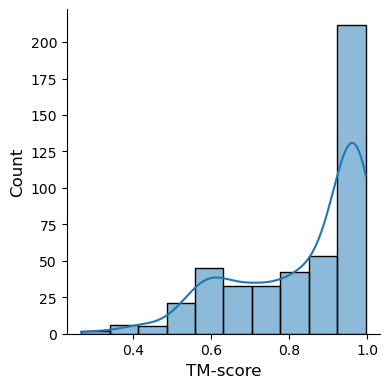

(0.0, 232.05)


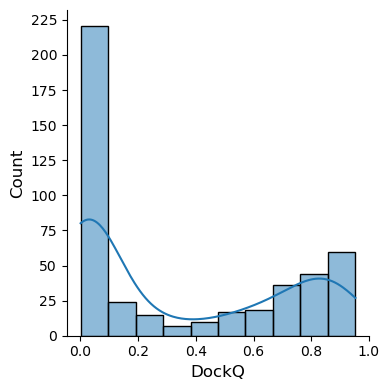

In [9]:
score_distribution_metrics = ['mmalign_tmscore', 'dockq']
plot_scores_histograms([results_df_fullseq_both_af2], score_distribution_metrics, plot_type='hist_with_kde',
                       output_dir='../results/plots_benchmark', 
                       output_name='af2_both_deduplicated')

#### AF3 benchmark scores distribution (input = full sequences)

(0.0, 273.0)


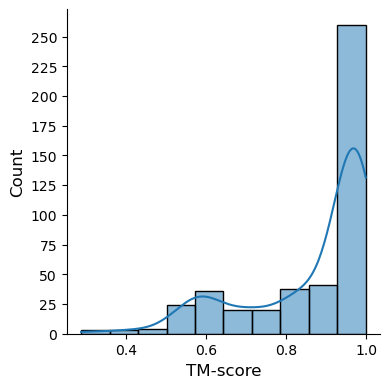

(0.0, 200.55)


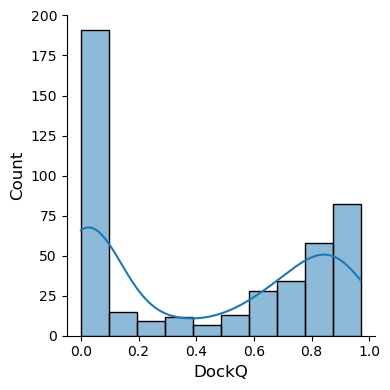

In [11]:
score_distribution_metrics = ['mmalign_tmscore', 'dockq']
plot_scores_histograms([results_df_fullseq_both_af3], score_distribution_metrics, plot_type='hist_with_kde',
                       output_dir='../../host_pathogen_ppi_struct_pred/results/plots_benchmark', 
                       output_name='af3_both_deduplicated')

#### Correlation between true and predicted scores (AF2):

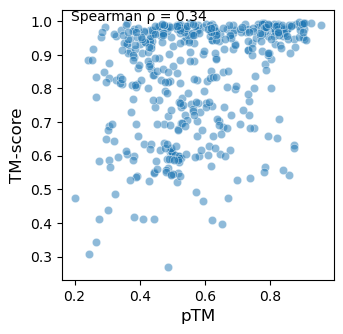

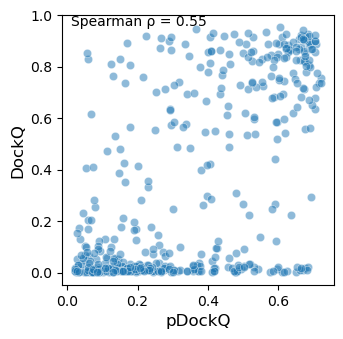

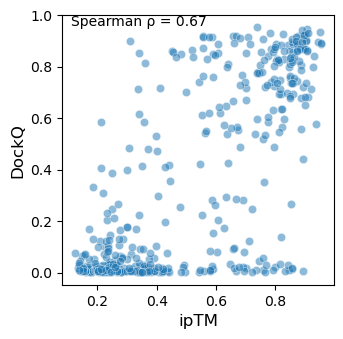

In [15]:
plot_scoring_metrics_correlations(results_df_fullseq_both_af2, output_dir='../results/plots_benchmark', output_name='af2_both', color=sns.color_palette()[0])

#### Correlation between true and predicted scores (AF3):

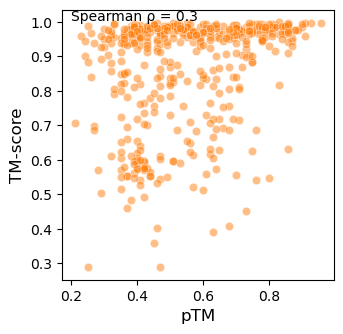

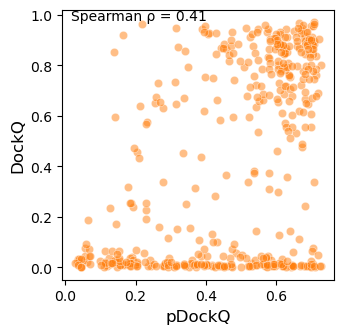

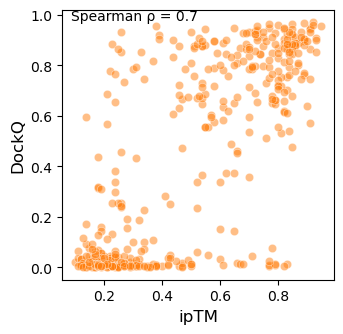

In [17]:
plot_scoring_metrics_correlations(results_df_fullseq_both_af3, output_dir='../results/plots_benchmark', output_name='af3_both', color=sns.color_palette()[1])

Correlation between ptm and TM-score is slightly lower for AF3 structures. Correlation between iptm and DockQ scores is higher for AF3 structures.

#### Compare virus and bacteria datasets (AF2)

p-value: 0.5747487473026999


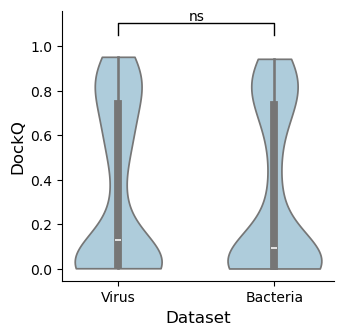

In [20]:
plot_comparison_virus_vs_bacteria(virus_results_df=virus_fullseq_df, bacteria_results_df=bacteria_fullseq_df, metric='dockq', 
                                  output_filepath='../results/plots_benchmark/virus_vs_bacteria_dockq_violinplot.svg',
                                  plot_type='violinplot')

#### Compare entries with antibodies and entries without antibodies

Entries with antibodies: 119
Entries without antibodies: 333
p-value: 0.0012930359989064147


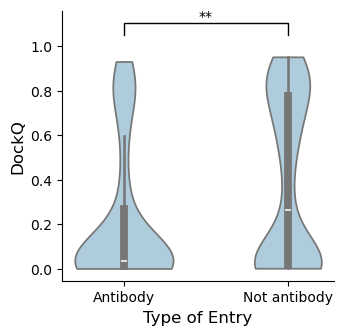

In [11]:
plot_comparison_antibodies(results_df=results_df_fullseq_both_af2, metadata_df=metadata_df_both_deduplicated, metric='dockq', 
                           output_filepath='../results/plots_benchmark/antibody_vs_nonantibody_dockq_violinplot.svg', plot_type='violinplot')

#### Compare AF2-multimer and AF3 results (input = full sequences)

(Statistical significance symbols based on the p-values from Wilcoxon-signed rank tests) 

p-value: 3.927183445308126e-09


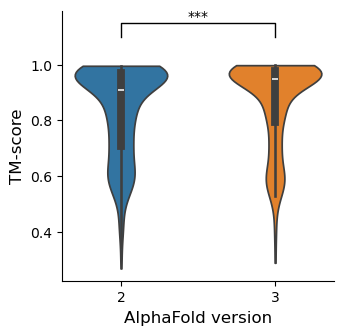

p-value: 1.3580612993144938e-05


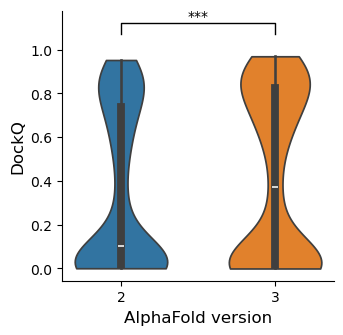

In [24]:
compare_af2_vs_af3(results_df_fullseq_both_af2, results_df_fullseq_both_af3, output_dir='../results/plots_benchmark', output_name='af2_vs_af3')

After training set cutoff date

In [25]:
af2_merged_df = results_df_fullseq_both_af2.merge(metadata_df_both_deduplicated, how='inner', left_on='name', right_on='assembly_id')
af2_merged_df['release_date'] = af2_merged_df['entry.rcsb_accession_info.initial_release_date'].apply(classify_release_date)
af2_merged_df_after = copy.deepcopy(af2_merged_df[af2_merged_df['release_date'] == 'After training set cutoff'])
print(af2_merged_df_after.shape)

af3_merged_df = results_df_fullseq_both_af3.merge(metadata_df_both_deduplicated, how='inner', left_on='name', right_on='assembly_id')
af3_merged_df['release_date'] = af3_merged_df['entry.rcsb_accession_info.initial_release_date'].apply(classify_release_date)
af3_merged_df_after = copy.deepcopy(af3_merged_df[af3_merged_df['release_date'] == 'After training set cutoff'])
print(af3_merged_df_after.shape)

(93, 103)
(91, 90)


p-value: 0.6322494522146568


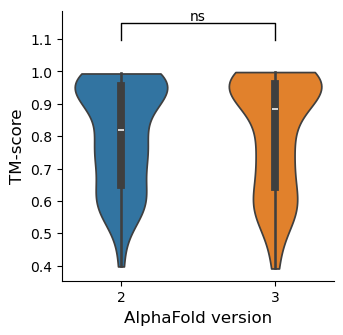

p-value: 0.5453079391582624


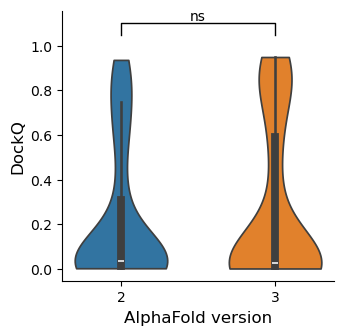

In [26]:
compare_af2_vs_af3(af2_merged_df_after, af3_merged_df_after, output_dir='../results/plots_benchmark', output_name='af2_vs_af3_after_training_cutoff')

Differences between AF2 and AF3 scores are not significant for pairs released after the training cut-off date (2021/09/30), which is the same for both versions.

#### Correlation between predicted and true scores for pairs released after the training cut-off date

AF2

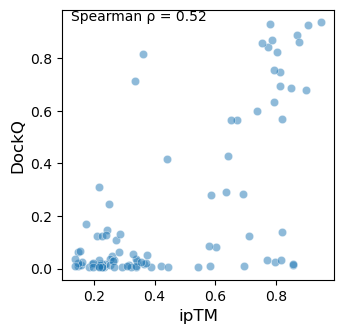

In [30]:
plot_true_vs_predicted_scores(results_df=af2_merged_df_after, metric1='iptm', metric2='dockq', 
                              output_filepath=os.path.join('../results/plots_benchmark/', 'af2_after_training_cutoff_iptm_dockq_scatterplot.svg'), 
                              correlation_type='spearman', figsize=(3.5, 3.5))

AF3

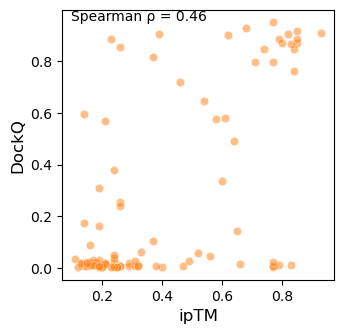

In [32]:
plot_true_vs_predicted_scores(results_df=af3_merged_df_after, metric1='iptm', metric2='dockq', 
                              output_filepath=os.path.join('../results/plots_benchmark/', 'af3_after_training_cutoff_iptm_dockq_scatterplot.svg'), 
                              correlation_type='spearman', color=sns.color_palette()[1], figsize=(3.5, 3.5))

Lower correlation between iptm and DockQ scores for pairs released after the training cutoff date when using AF3 vs. AF2. For AF3 there are more pairs with high DockQ scores that had low iptm scores.

In [34]:
af2_merged_df_after_highiptm = af2_merged_df_after[af2_merged_df_after['iptm']>= 0.5]
af3_merged_df_after_highiptm = af3_merged_df_after[af3_merged_df_after['iptm']>= 0.5]
af2_corr = spearmanr(af2_merged_df_after_highiptm['iptm'].values, af2_merged_df_after_highiptm['dockq'].values)[0]
print(f'Correlation between iptm and DockQ for AF2 pairs with iptm >= 0.5: {af2_corr}')
af3_corr = spearmanr(af3_merged_df_after_highiptm['iptm'].values, af3_merged_df_after_highiptm['dockq'].values)[0]
print(f'Correlation between iptm and DockQ for AF3 pairs with iptm >= 0.5: {af3_corr}')

Correlation between iptm and DockQ for AF2 pairs with iptm >= 0.5: 0.4722689075630252
Correlation between iptm and DockQ for AF3 pairs with iptm >= 0.5: 0.38986997365514237


#### Percentage of pairs per CAPRI class for AF2 and AF3, all pairs and only pairs released after the training cutoff

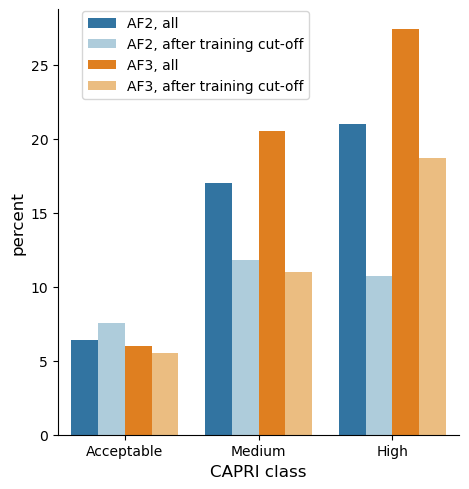

In [36]:
# % of entries (or counts) in each CAPRI class (as defined by the thresholds in the DockQ github repo)
results_df_fullseq_both_af2['Results'] = 'AF2, all'
results_df_fullseq_both_af3['Results'] = 'AF3, all'
af2_merged_df_after['Results'] = 'AF2, after training cut-off'
af3_merged_df_after['Results'] = 'AF3, after training cut-off'
results_dfs = [results_df_fullseq_both_af2, results_df_fullseq_both_af3, af2_merged_df_after, af3_merged_df_after]
concat_df = pd.concat(results_dfs)
#fig, ax = plt.subplots(figsize=(4, 4))
capri_col = 'CAPRI class'
df = copy.deepcopy(concat_df).dropna(subset='dockq', axis=0)
df[capri_col] = df['dockq'].apply(get_capri_class) # create a col with CAPRI class based on DockQ thresholds
#sns.countplot(df, x=capri_col, hue='Interactions', stat='percent', order=['Incorrect', 'Acceptable', 'Medium', 'High'], ax=ax)
df_grouped = df.groupby('Results')[capri_col].value_counts(normalize=True)
df_grouped = df_grouped.mul(100)
df_grouped = df_grouped.rename('percent').reset_index()

custom_palette = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[0], sns.color_palette("Paired")[7], sns.color_palette("Paired")[6]]
g = sns.catplot(data=df_grouped, x=capri_col, y='percent', hue='Results', kind='bar', order=['Acceptable', 'Medium', 'High'],
               hue_order=['AF2, all', 'AF2, after training cut-off', 'AF3, all', 'AF3, after training cut-off'],
               palette=sns.color_palette(custom_palette, len(custom_palette)))
#sns.move_legend(g, 'lower center', bbox_to_anchor=(0.4, -0.1), ncol=2,  frameon=True)
sns.move_legend(g, 'upper left', bbox_to_anchor=(0.15, 0.98), ncol=1, frameon=True)
g.legend.set_title('')
#g.ax.set_ylim(0,100)

#for p in g.ax.patches:
#    txt = str(np.round(p.get_height(), 1)) + '%'
#    txt_x = p.get_x() 
#    txt_y = p.get_height()
#    if txt_y != 0:
#        g.ax.text(txt_x,txt_y,txt, fontsize='xx-small')
    
plt.xlabel('CAPRI class')
plt.savefig('../results/plots_benchmark/af2_af3_training_cutoff_capri_countplot.svg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

DockQ "success rates", to confirm

In [38]:
dfs_list = [('AF2', results_df_fullseq_both_af2), ('AF3', results_df_fullseq_both_af3), 
            ('AF2, after training cut-off', af2_merged_df_after), 
             ('AF3, after training cut-off', af3_merged_df_after)]
for name, df in dfs_list:
    print(name)
    get_success_rates(df)

AF2
DockQ success rate: 44.47%
Acceptable quality pairs: 6.42%
Medium quality pairs: 17.04%
High quality pairs: 21.02%
AF3
DockQ success rate: 53.9%
Acceptable quality pairs: 6.01%
Medium quality pairs: 20.49%
High quality pairs: 27.39%
AF2, after training cut-off
DockQ success rate: 30.11%
Acceptable quality pairs: 7.53%
Medium quality pairs: 11.83%
High quality pairs: 10.75%
AF3, after training cut-off
DockQ success rate: 35.16%
Acceptable quality pairs: 5.49%
Medium quality pairs: 10.99%
High quality pairs: 18.68%


In [39]:
iptm_thresholds = [0.5, 0.75]
for name, df in dfs_list:
    print(name)
    for threshold in iptm_thresholds:
        threshold_df = df[df['iptm'] >= threshold]
        ge_023 = np.round(((threshold_df['dockq'].ge(0.23).sum() / threshold_df.shape[0]) * 100), 2)
        ge_049 = np.round(((threshold_df['dockq'].ge(0.49).sum() / threshold_df.shape[0]) * 100), 2)
        ge_08 = np.round(((threshold_df['dockq'].ge(0.8).sum() / threshold_df.shape[0]) * 100), 2)
        print(f'iptm >= {threshold} - pairs with DockQ scores >= 0.23: {ge_023}%; >= 0.49: {ge_049}%; >= 0.80: {ge_08}%')
        print(f'Number of pairs with iptm >= {threshold}: {threshold_df.shape[0]}')

AF2
iptm >= 0.5 - pairs with DockQ scores >= 0.23: 80.19%; >= 0.49: 74.53%; >= 0.80: 41.51%
Number of pairs with iptm >= 0.5: 212
iptm >= 0.75 - pairs with DockQ scores >= 0.23: 88.89%; >= 0.49: 86.51%; >= 0.80: 52.38%
Number of pairs with iptm >= 0.75: 126
AF3
iptm >= 0.5 - pairs with DockQ scores >= 0.23: 90.32%; >= 0.49: 85.71%; >= 0.80: 51.15%
Number of pairs with iptm >= 0.5: 217
iptm >= 0.75 - pairs with DockQ scores >= 0.23: 93.1%; >= 0.49: 92.24%; >= 0.80: 58.62%
Number of pairs with iptm >= 0.75: 116
AF2, after training cut-off
iptm >= 0.5 - pairs with DockQ scores >= 0.23: 65.71%; >= 0.49: 54.29%; >= 0.80: 25.71%
Number of pairs with iptm >= 0.5: 35
iptm >= 0.75 - pairs with DockQ scores >= 0.23: 72.73%; >= 0.49: 72.73%; >= 0.80: 40.91%
Number of pairs with iptm >= 0.75: 22
AF3, after training cut-off
iptm >= 0.5 - pairs with DockQ scores >= 0.23: 70.0%; >= 0.49: 66.67%; >= 0.80: 43.33%
Number of pairs with iptm >= 0.5: 30
iptm >= 0.75 - pairs with DockQ scores >= 0.23: 70.59